# Fisher analysis

In [1]:
# standard library imports
import math
import numpy as np
# import schnell as snl
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import simpson as simps
from scipy.fft import fft

# dependent file imports
from fisher_analysis import fisher_analysis

## Define parameters, instantiate classes

In [2]:
cosmo_params = {
    'redshift' : np.linspace(0,4),
    'frequency': np.linspace(10**0,10**4),
    'f_e' : 1,
    't_e' : 1,
    't_a' : 2,
}
phenom_params = {
    'A' : 1,
    'alpha' : 4,
    'lambda_g' : 1.6 * 10 ** 16,
}
wf_params = {
        'approximant': 'TaylorF2',
        'mass1': 10,
        'mass2': 15,
        'delta_f': 1.0 / 170, 
        'f_lower': 40,
}

In [3]:
fisher = fisher_analysis(cosmo_params, phenom_params, wf_params)
fisher.wf.phenom_params

{'A': 1, 'alpha': 4, 'lambda_g': 1.6e+16}

## Retrieve modified signal

In [4]:
h_plus, h_cross = fisher.wf.h_modified()

/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:91: RuntimeWarning: divide by zero encountered in true_divide
  return math.sqrt(math.pi / 30) * (self.chirp_mass ** 2 / D_L)
/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:71: RuntimeWarning: divide by zero encountered in power
  term_ii = D_alpha / np.power(self.lambda_A(), (2 - self.alpha))


In [5]:
# arr = [-np.inf]
# print("\nTest modified signal array for positive or negative infinity:", True if any(np.isinf(arr)) else False)

In [6]:
print("\nTest modified signal array for positive or negative infinity:", True if any(np.isinf(h_plus)) or any(np.isinf(h_cross)) else False)


Test modified signal array for positive or negative infinity: False


In [7]:
h_plus

array([ 0.00000000e+00, -8.40576929e-10,  1.65049930e-10, -4.64457370e-11,
        3.39251192e-12,  1.98710460e-11,  1.45597955e-11,  9.75830717e-12,
        6.72373215e-12,  4.83154662e-12,  3.60803699e-12,  2.78262301e-12,
        2.20369465e-12,  1.78378493e-12,  1.47040695e-12,  1.23080633e-12,
        1.04379394e-12,  8.95215128e-13,  7.75342343e-13,  6.77321293e-13,
        5.96214485e-13,  5.28394981e-13,  4.71151775e-13,  4.22426720e-13,
        3.80635319e-13,  3.44542228e-13,  3.13173237e-13,  2.85752022e-13,
        2.61654024e-13,  2.40372366e-13,  2.21492347e-13,  2.04672149e-13,
        1.89628069e-13,  1.76123128e-13,  1.63958182e-13,  1.52964947e-13,
        1.43000467e-13,  1.33942706e-13,  1.25687002e-13,  1.18143200e-13,
        1.11233326e-13,  1.04889670e-13,  9.90532277e-14,  9.36723923e-14,
        8.87018823e-14,  8.41018386e-14,  7.98370694e-14,  7.58764151e-14,
        7.21922099e-14,  6.87598262e-14])

In [8]:
h_cross

array([ 0.00000000e+00, -2.35245630e-10,  8.33163726e-11, -5.67244555e-11,
        3.75347663e-11,  1.02775096e-11, -3.26596479e-14, -2.62025211e-12,
       -2.97491355e-12, -2.72995926e-12, -2.36147671e-12, -2.00713084e-12,
       -1.70144204e-12, -1.44716687e-12, -1.23807024e-12, -1.06630976e-12,
       -9.24708553e-13, -8.07298776e-13, -7.09299092e-13, -6.26933553e-13,
       -5.57231866e-13, -4.97854357e-13, -4.46950534e-13, -4.03048712e-13,
       -3.64971156e-13, -3.31769218e-13, -3.02673744e-13, -2.77057071e-13,
       -2.54403772e-13, -2.34288012e-13, -2.16355924e-13, -2.00311807e-13,
       -1.85907252e-13, -1.72932523e-13, -1.61209679e-13, -1.50587064e-13,
       -1.40934856e-13, -1.32141466e-13, -1.24110593e-13, -1.16758815e-13,
       -1.10013611e-13, -1.03811714e-13, -9.80977529e-14, -9.28231126e-14,
       -8.79449831e-14, -8.34255571e-14, -7.92313536e-14, -7.53326448e-14,
       -7.17029687e-14, -6.83187127e-14])

## Compute noise power spectrum

In [9]:
f = cosmo_params['frequency']

In [10]:
# use schNell to generate noise power spectrum for LIGO detector

In [11]:
# nside = 64
# obs_time = 365 * 24 * 3600
# freqs = f

# nl = mc.get_N_ell(obs_time, freqs, nside, no_autos=True)
## Just for show, let's also calculate the N_ell you'd get
## if both detectors had a 50% correlation coefficient.
# nl_0p5 = mc0p5.get_N_ell(obs_time, freqs, nside, no_autos=True)

## Plotting time!
# ls = np.arange(3 * nside)
# plt.figure()
# plt.plot(ls, nl, label=r'$r=0$')
# plt.plot(ls, nl_0p5, label=r'$r=0.5$')
# plt.xlim([1, 100])
# plt.ylim([3E-20, 1E-10])
# plt.legend(loc='upper left')
# plt.xlabel(r'$\ell$', fontsize=16)
# plt.ylabel(r'$N_\ell$', fontsize=16)
# plt.loglog();

In [12]:
# using scipy implementation of welch method

In [13]:
# using pypot psd function

In [14]:
# a0 = plt.plot(f)
# plt.plot(f, NFFT = 301, Fs = 2, pad_to = 1024, scale_by_freq = True)

### LIGO

In [15]:
# using source [66] (arXiv:1005.0304)

In [16]:
S_0 = 10**(-49) # 1/Hz
f_0 = 215 # Hz
f_s = 10 # Hz (low energy cuttoff)
x = f / f_0

In [17]:
exp = 16 - 4 * (x * f_0 - 7.9)**2
poly = (1 - 0.23 * x**2 + 0.0764 * x**4) / (1 + 0.17 * x**2)

In [18]:
snd = lambda x : S_0 * ( 10**exp + 2.4 * 10**(-62) * x**(-50) + 0.08 * x**(-4.69) + 123.35 * poly)

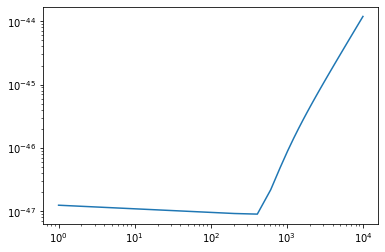

In [19]:
plt.loglog(f, snd(f))

### ET

In [20]:
S_0_ET = 10**(-50) # 1 / Hz
f_0_ET = 100 # Hz
f_s = 1 # Hz (low energy cutoff)
f_ET = np.linspace(10**0, 10**4)
x = f_ET / f_0_ET

In [21]:
csts = [2.39 * 10**(-27), 0.349, 1.76, 0.409]
exps = [-15.64, -2.145, -0.12, 1.10]
for i,j in zip(csts, exps):
    poly += i * x **j
snd_ET = S_0 * poly**2

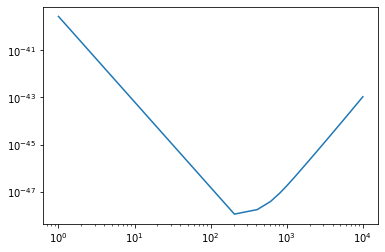

In [22]:
plt.loglog(f_ET, snd_ET)

## Integrated signal

In [23]:
# DOI: 10.1016/j.measurement.2014.09.004

## Partial derivatives

In [24]:
wf = fisher.wf

In [25]:
f_max = 6**(-3/2) * math.pi**(-1) * wf.eta**(3/5) * wf.chirp_mass**(-1)

In [26]:
# paper says (10**5, 10**3, 1) for LIGO, ET, LISA-like

### For phenomenological parameters

In [27]:
g = lambda x : 10**exp + 2.4 * 10**(-62) * x**(-50) + 0.08 * x**(-4.69) + 123.35 * poly

In [28]:
1/g(x)

array([4.16666667e-39, 2.43435229e-03, 1.95197554e-03, 1.31066275e-03,
       8.58966202e-04, 5.88251783e-04, 4.24200097e-04, 3.19632487e-04,
       2.49439963e-04, 2.00168917e-04, 1.64276978e-04, 1.37317888e-04,
       1.16545871e-04, 1.00194567e-04, 8.70867510e-05, 7.64134622e-05,
       6.76038498e-05, 6.02456482e-05, 5.40350024e-05, 4.87438978e-05,
       4.41984722e-05, 4.02642452e-05, 3.68358502e-05, 3.38297656e-05,
       3.11790821e-05, 2.88296794e-05, 2.67373935e-05, 2.48658909e-05,
       2.31850561e-05, 2.16697534e-05, 2.02988683e-05, 1.90545577e-05,
       1.79216587e-05, 1.68872183e-05, 1.59401174e-05, 1.50707670e-05,
       1.42708618e-05, 1.35331790e-05, 1.28514128e-05, 1.22200384e-05,
       1.16341980e-05, 1.10896065e-05, 1.05824722e-05, 1.01094302e-05,
       9.66748561e-06, 9.25396602e-06, 8.86648045e-06, 8.50288456e-06,
       8.16125065e-06, 7.83984193e-06])

In [29]:
# integrand = lambda q : x**(-q/3) / g(x)
integrand = lambda q : q 

In [30]:
moment = quad(integrand, 0, np.inf)
moment

/var/folders/9r/_r05m5k11w16t9gxs95gprd00000gn/T/ipykernel_54654/3349258680.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  moment = quad(integrand, 0, np.inf)


(0.4999999961769933, 5.7336234760563265e-06)

In [31]:
# since it is a moment perhaps it should be taken for discrete values of q...

In [32]:
integrand = x**(-7/3) / g(x)
integrand
moment = simps(integrand)
# need to update moment to improper integration

In [33]:
A, _ = wf.decompose()
np.nan_to_num(A, copy=False, nan=0.0, posinf=0.0, neginf=0.0)
rho = 2 * wf.eta * A * (wf.chirp_mass * math.pi)**(-7/6) * f_0**(-2/3) * moment**(1/2) * S_0**(-1/2)

/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:91: RuntimeWarning: divide by zero encountered in true_divide
  return math.sqrt(math.pi / 30) * (self.chirp_mass ** 2 / D_L)


In [34]:
new_amp = rho / (2 * wf.eta * (wf.chirp_mass * math.pi)**(-7/6) * f_0**(-2/3) * moment**(1/2) * S_0**(-1/2))

In [35]:
for i in range(len(A)):
    print(math.isclose(A[i], new_amp[i], rel_tol=.00001)) if False else 0

In [36]:
new_amp = np.nan_to_num(new_amp, copy=False, nan=0.0, posinf=0.0, neginf=0.0)

In [37]:
# problem taking ln(A)

In [38]:
# partial derivative with respect to ln of modified amplitude defined from SNR
np.gradient(h_plus, new_amp)

array([-1.27144748e+01, -8.92819606e+01, -2.81926438e+01,  2.55334557e+02,
       -1.03959487e+01,  1.21684715e-02, -1.26428478e+00, -1.15433458e+00,
       -3.36985166e+00,  1.29753150e+01,  4.42247998e+00,  1.38514918e+00,
        8.76553425e-01,  6.53862829e-01,  5.26139627e-01,  4.42530780e-01,
        3.83231626e-01,  3.38820508e-01,  3.04214346e-01,  2.76420421e-01,
        2.53558962e-01,  2.34388546e-01,  2.18055710e-01,  2.03954000e-01,
        1.91640367e-01,  1.80783407e-01,  1.71130112e-01,  1.62483858e-01,
        1.54689420e-01,  1.47622539e-01,  1.41182499e-01,  1.35286750e-01,
        1.29866940e-01,  1.24865961e-01,  1.20235692e-01,  1.15935278e-01,
        1.11929791e-01,  1.08189174e-01,  1.04687410e-01,  1.01401856e-01,
        9.83127027e-02,  9.54025382e-02,  9.26559916e-02,  9.00594369e-02,
        8.76007483e-02,  8.52690965e-02,  8.30547770e-02,  8.09490654e-02,
        7.89440952e-02,  7.79876067e-02])

In [39]:
alphas = np.arange(0,4.5,.5)
for alpha in alphas:
    print(np.gradient(h_plus, alpha))

[-inf  inf  inf -inf  inf  inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf]
[-1.68115386e-09  1.65049930e-10  7.94131192e-10 -1.61657418e-10
  6.63167830e-11  1.11672836e-11 -1.01127389e-11 -7.83606334e-12
 -4.92676054e-12 -3.11569516e-12 -2.04892361e-12 -1.40434234e-12
 -9.98838083e-13 -7.33287700e-13 -5.52978601e-13 -4.26613010e-13
 -3.35591198e-13 -2.68451597e-13 -2.17893835e-13 -1.79127858e-13
 -1.48926311e-13 -1.25062710e-13 -1.05968261e-13 -9.05164561e-14
 -7.78844929e-14 -6.74620819e-14 -5.87902053e-14 -5.15192125e-14
 -4.53796566e-14 -4.01616773e-14 -3.57002169e-14 -3.18642779e-14
 -2.85490209e-14 -2.56698875e-14 -2.31581813e-14 -2.09577150e-14
 -1.90222405e-14 -1.73134651e-14 -1.57995056e-14 -1.44536762e-14
 -1.32535300e-14 -1.21800979e-14 -1.12172781e-14 -1.03513454e-14
 -9.57055375e-15 -8.86481293e-

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:1211: RuntimeWarning: divide by zero encountered in true_divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:1232: RuntimeWarning: divide by zero encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:1239: RuntimeWarning: divide by zero encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


### For waveform parameters

In [40]:
# partial derivative with respect to ln of chirp mass
np.gradient(h_plus, np.log(wf.chirp_mass))

array([ 1.11246356e-10, -1.09217864e-11, -5.25497419e-11,  1.06972950e-11,
       -4.38835530e-12, -7.38968416e-13,  6.69186429e-13,  5.18532844e-13,
        3.26016655e-13,  2.06173713e-13,  1.35582644e-13,  9.29290123e-14,
        6.60957332e-14,  4.85235686e-14,  3.65920430e-14,  2.82301007e-14,
        2.22069489e-14,  1.77641456e-14,  1.44186060e-14,  1.18533597e-14,
        9.85484424e-15,  8.27572725e-15,  7.01219749e-15,  5.98971108e-15,
        5.15382098e-15,  4.46414273e-15,  3.89030193e-15,  3.40916129e-15,
        3.00289078e-15,  2.65760342e-15,  2.36237690e-15,  2.10854276e-15,
        1.88916352e-15,  1.69864372e-15,  1.53243754e-15,  1.38682692e-15,
        1.25875150e-15,  1.14567735e-15,  1.04549469e-15,  9.56437624e-16,
        8.77020811e-16,  8.05988996e-16,  7.42276684e-16,  6.84975646e-16,
        6.33308619e-16,  5.86607900e-16,  5.44297827e-16,  5.05880389e-16,
        4.70923333e-16,  4.54259643e-16])

In [41]:
# partial derivative with respect to eta, the mass ratio
np.gradient(h_plus, np.log(wf.eta))

array([ 5.89003781e-10, -5.78263748e-11, -2.78229308e-10,  5.66377849e-11,
       -2.32345396e-11, -3.91253437e-12,  3.54306740e-12,  2.74541852e-12,
        1.72612434e-12,  1.09160516e-12,  7.17854436e-13,  4.92020967e-13,
        3.49949771e-13,  2.56912373e-13,  1.93739844e-13,  1.49466793e-13,
        1.17576677e-13,  9.40538575e-14,  7.63405991e-14,  6.27586732e-14,
        5.21773542e-14,  4.38165780e-14,  3.71267067e-14,  3.17130610e-14,
        2.72873661e-14,  2.36358029e-14,  2.05975515e-14,  1.80501093e-14,
        1.58990738e-14,  1.40709190e-14,  1.25078158e-14,  1.11638682e-14,
        1.00023452e-14,  8.99362108e-15,  8.11362761e-15,  7.34267913e-15,
        6.66457238e-15,  6.06589120e-15,  5.53546512e-15,  5.06394454e-15,
        4.64346512e-15,  4.26738082e-15,  3.93005029e-15,  3.62666482e-15,
        3.35310913e-15,  3.10584799e-15,  2.88183353e-15,  2.67842896e-15,
        2.49334570e-15,  2.40511831e-15])

In [42]:
# partial derivative with respect to beta parameter, which describes massive graviton
np.gradient(h_plus, wf.beta())

array([-6.24634639e+23,  8.81367329e+22,  2.94542946e+23, -6.20388780e+22,
        2.74592844e+22,  4.55560117e+21, -4.53713138e+21, -3.60359929e+21,
       -2.33014817e+21, -1.51360882e+21, -1.02051010e+21, -7.15762216e+20,
       -5.19994039e+20, -3.89257769e+20, -2.98838563e+20, -2.34362208e+20,
       -1.87154896e+20, -1.51794243e+20, -1.24778831e+20, -1.03780770e+20,
       -8.72115266e+19, -7.39616230e+19, -6.32399272e+19, -5.44717445e+19,
       -4.72325941e+19, -4.12042062e+19, -3.61446873e+19, -3.18679142e+19,
       -2.82290598e+19, -2.51142684e+19, -2.24331857e+19, -2.01134833e+19,
       -1.80967971e+19, -1.63356803e+19, -1.47912944e+19, -1.34316424e+19,
       -1.22302048e+19, -1.11648782e+19, -1.02171422e+19, -9.37140168e+18,
       -8.61446287e+18, -7.93511431e+18, -7.32378908e+18, -6.77229118e+18,
       -6.27357266e+18, -5.82155105e+18, -5.41095928e+18, -5.03722153e+18,
       -4.69635019e+18, -4.53377888e+18])

In [43]:
# partial derivative with respect to beta parameter, which describes Lorentz-violating terms
wf.zeta()

/Users/michellegurevich/Desktop/gravitationalwaves/modgravity/waveforms.py:71: RuntimeWarning: divide by zero encountered in power
  term_ii = D_alpha / np.power(self.lambda_A(), (2 - self.alpha))


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])